# Problem 1
All codes and plots are presented below.

(148, 4)
block x: 0  y: 0  mean: 5.053162181632653  var: 0.12913161005859455  std: 0.35934886956632345
block x: 0  y: 1  mean: 3.4679894714285715  var: 0.14607228551922247  std: 0.38219404171078136
block x: 0  y: 2  mean: 1.5226844877551022  var: 0.03382568948071495  std: 0.1839176160152011
block x: 0  y: 3  mean: 0.29568692897959187  var: 0.012976465104715652  std: 0.11391428841333141
block x: 1  y: 0  mean: 5.98557274  var: 0.2672234252312528  std: 0.5169365775714201
block x: 1  y: 1  mean: 2.812914904  var: 0.09604394954117478  std: 0.3099095828482475
block x: 1  y: 2  mean: 4.313188786  var: 0.21481280231293198  std: 0.46347902035899313
block x: 1  y: 3  mean: 1.3812363419999998  var: 0.03908708454437844  std: 0.1977045385022267
block x: 2  y: 0  mean: 6.659832106122448  var: 0.3940918895499536  std: 0.6277673849045947
block x: 2  y: 1  mean: 3.0217254367346937  var: 0.10522053799600517  std: 0.32437715393659455
block x: 2  y: 2  mean: 5.612717085714286  var: 0.3002250558894633  st

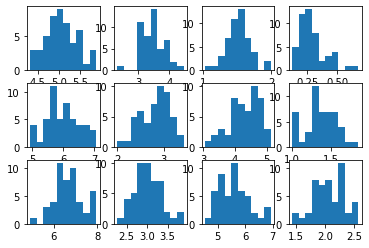

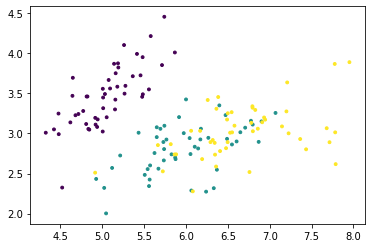

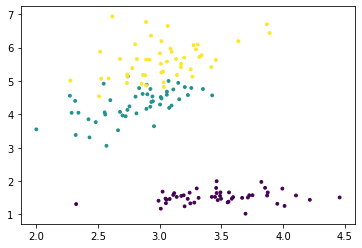

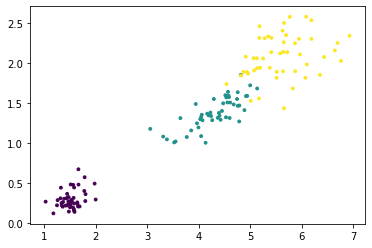

In [1]:
%matplotlib inline
#used to plot in jupyter

import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt("data/iris.txt",delimiter=None)    # load the text file
Y = iris[:,-1]  # target value is the last column
X = iris[:,0:-1]    # features are the other columns
print(X.shape)
x1 = x2 = 0
for i in range(len(Y)):
    if x1 != 0 and x2 != 0:
        break
    if Y[i] == 1 and x1 == 0:
        x1 = i
    elif Y[i] == 2 and x2 == 0:
        x2 = i

fig, axs = plt.subplots(3,4)
for i in range(3):
    for j in range(4):
        if i == 0:
            tmpX = X[0:x1,j]
        elif i == 1:
            tmpX = X[x1:x2,j]
        else:
            tmpX = X[x2:len(Y),j]
        axs[i][j].hist(tmpX)
        print('block x:', i, ' y:', j, ' mean:', np.mean(tmpX), ' var:', np.var(tmpX), ' std:', np.std(tmpX))

X12 = iris[:,0:2]
plt.figure()
plt.scatter(X12[:,0], X12[:,1], s=8, c=Y)
X23 = iris[:,1:3]
plt.figure()
plt.scatter(X23[:,0], X23[:,1], s=8, c=Y)
X34 = iris[:,2:4]
plt.figure()
plt.scatter(X34[:,0], X34[:,1], s=8, c=Y)

plt.show()

# Problem 2
1. Under what condition does a matrix have an inverse?
    - the matrix must has same number of columns and rows
    - the determinant of this matrix cannot be zero
2. compute the determinant of A and B
    - |A| = 1\*(-2-3) - 2\*(4-1) + 2\*(6+1) = 3
    - |B| = 0 - (-3)\*(1+6) + (-2)\*(4+12) = -11
3. compute inverse of A and B

inverse | of | A | | inverse | of | B
--- | --- | --- | --- | --- | --- | ---
-5/3 | 2/3 | 4/3 | | 4 | -5 | -2
-1 | 0 | 1 | | 5 | -6 | -2
7/3 | -1/3 | -5/3 | | -8 | 9 | 3

4. compute inverse of product of A and B

inverse | of | AxB
--- | --- | ---
-14 | 49/3 | -2/3
-12 | 14 | 1
21 | -74/3 | 1/3

# Problem 3.1  
All codes and plots are presented below.  
When increasing K, the model becomes simpler and finally 3 big area without inserction. However largest K will result
in largest bias and lowest variance.  
Large k: under-fit. Low k: over-fit

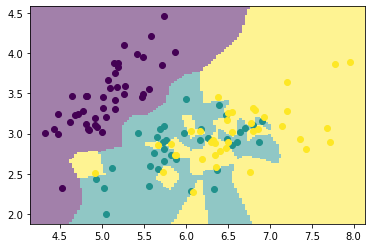

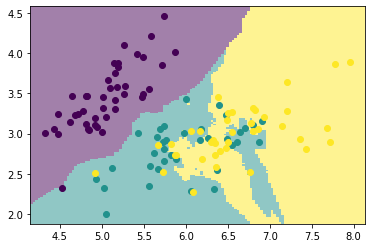

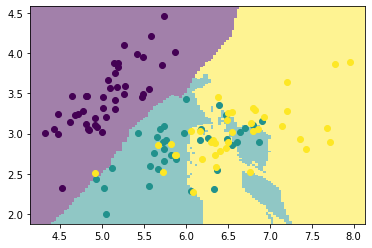

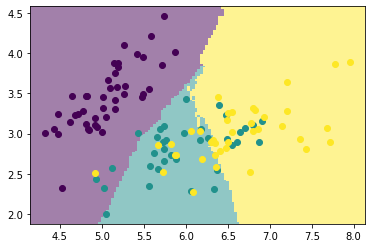

In [2]:
%matplotlib inline
#used to plot in jupyter

import mltools as ml
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/mltools/')

np.random.seed(0)
K = [1, 5, 10, 50]

iris = np.genfromtxt("data/iris.txt",delimiter=None)    # load the data
Y = iris[:,-1]
X = iris[:,0:2]
X,Y = ml.shuffleData(X,Y)  # shuffle data randomly
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.8)   # split data into 80/20 train/validation

knn = ml.knn.knnClassify()  # create the object and train it

for vark in K:
    knn.train(Xtr, Ytr, vark)  # where K is an integer, e.g. 1 for nearest neighbor prediction
    YvaHat = knn.predict(Xva)   # get estimates of y for each data point in Xva
    plt.figure()
    ml.plotClassify2D( knn, Xtr, Ytr )
plt.show()

# Problem 3.2 & 3.3  
All codes and plots are presented below.  
The first figure is for 3.2  
K = 100 has a better result where ValidErr and TrainErr are basically the same. K = 100 is recommended.  
The second figure is for 3.3  
The plot is similar to last one but different. This one has smaller difference between TrainErr and ValidErr.  
over-fitting start from K = 50. I would recommend K = 10.

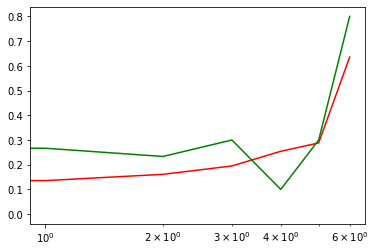

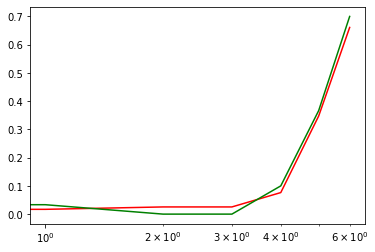

In [3]:
%matplotlib inline
#used to plot in jupyter

import mltools as ml
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('/mltools/')

def ErrorPerc(Y1, Y2):
    count = 0
    for i in range(len(Y1)):
        if Y1[i] != Y2[i]:
            count += 1
    return count/len(Y1)

np.random.seed(0)
K2 = [1, 2, 5, 10, 50, 100, 200]

#3.2 part
iris = np.genfromtxt("data/iris.txt",delimiter=None)    # load the data
Y = iris[:,-1]
X = iris[:,0:2]
X,Y = ml.shuffleData(X,Y)  # shuffle data randomly
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.8)   # split data into 80/20 train/validation

knn = ml.knn.knnClassify()  # create the object and train it
errTrain = []
errValid = []
for i, k2 in enumerate(K2):
    knn.train(Xtr, Ytr, k2)
    YHat = knn.predict(Xtr)
    errTrain.append(ErrorPerc(YHat, Ytr))
    YvaHat = knn.predict(Xva)
    errValid.append(ErrorPerc(YvaHat, Yva))
plt.semilogx(errTrain, color='r')
plt.semilogx(errValid, color='g')

#3.3 part
Y = iris[:,-1]
X = iris[:,0:-1]
plt.figure()
X,Y = ml.shuffleData(X,Y)  # shuffle data randomly
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.8)   # split data into 80/20 train/validation

knn = ml.knn.knnClassify()  # create the object and train it
errTrain = []
errValid = []
for i, k2 in enumerate(K2):
    knn.train(Xtr, Ytr, k2)
    YHat = knn.predict(Xtr)
    errTrain.append(ErrorPerc(YHat, Ytr))
    YvaHat = knn.predict(Xva)
    errValid.append(ErrorPerc(YvaHat, Yva))
plt.semilogx(errTrain, color='r')
plt.semilogx(errValid, color='g')

plt.show()

# Problem 4
1. Compute all the probabilities necessary for a naive Bayes classifier  
p(y=1) = 4/10 p(y=-1) = 6/10  
p(x1=1 | y=-1) = 3/6 p(x1=0 | y=-1) = 3/6  
p(x1=1 | y=1) = 3/4 p(x1=0 | y=1) = 1/4  
p(x2=1 | y=-1) = 5/6 p(x2=0 | y=-1) = 1/6  
p(x2=1 | y=1) = 0 p(x2=0 | y=1) = 1  
p(x3=1 | y=-1) = 4/6 p(x3=0 | y=-1) = 2/6  
p(x3=1 | y=1) = 3/4 p(x4=0 | y=1) = 1/4  
p(x4=1 | y=-1) = 5/6 p(x4=0 | y=-1) = 1/6  
p(x4=1 | y=1) = 2/4 p(x4=0 | y=1) = 2/4  
p(x5=1 | y=-1) = 2/6 p(x5=0 | y=-1) = 4/6  
p(x5=1 | y=1) = 1/4 p(x5=0 | y=1) = 3/4
2. predict [0, 0, 0, 0, 0] and [1, 1, 0, 1, 0]  
P(y=1) in [0, 0, 0, 0, 0] = 1/4\*1\*1/4\*2/4\*3/4\*6/10 = 0.0141  
p(y=-1) in [0, 0, 0, 0, 0] = 3/6\*1/6\*2/6\*1/6\*4/6\*4/10 = 0.0012  
0.0141 > 0.0012, therefore, predict y = 1  
P(y=1) in [1, 1, 0, 1, 0] = 3/4\*0\*... = 0  
p(y=-1) in [1, 1, 0, 1, 0] = ... = nonzero positive  
nonzero positive > 0, therefore, predict y = -1
3. Compute the posterior probability that y = +1  
p(y=1 | x=[1,1,0,1,0]) = p(x=[1,1,0,1,0] | y=1)/p(x=[1,1,0,1,0])\*p(y=1) = 0
4. Compute the exact number of parameters in naive Bayes classifier and the “joint” Bayes classifier  
for naive bayes classifier, number of parameters: 2n+1 = 11  
for joint bayes classifier, number of parameters: (2^n-1)\*2+1 = 31  
joint bayes classifier has large number parameters resulting in larger complexity. 10 out of 2^5 dataset might not be enough for training.
5. we lose access to my address book. Should we re-train the model, and if so, how?  
we should re-train the model and discard the information on author.
the model takes x2,x3,x4,x5 and y. Number of parametes down to 9.  
However there will be drawback from the lack of data. For example, when [1,0,1,1,0] will give result y=1
but [0,0,1,1,0] will give result y=-1. Since x1 is ignored, this 2 data becomes same [0,1,1,0] but with different y.

# Problem 5
I have no teammate therefore no discussion.